# Kobe Bryant Shooting Data Visualization by Matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

Details：
- action_type
    - Jump Shot
    - Driving Dunk Shot
    - layup Shot
    - Running Jump Shot
- combined_shot_type
- game_event_id
- game_id
- lat location of a shot(demonsion)
- loc_x location of a shot
- loc_y location of a shot
- lon
- minutes_remaining (mins)
- period 
- playoffs
- season
- seconds_remaining
- shot_distance
- shot_made_flag
- shot_type
- shot_zone_area
- shot_zone_basic
    - Mid-Range
    - Restricted Area
    - In The Paint (Non-RA)
    - Above the Break 3
- shot_zone_range
- team_id
- team_name
- game_date
- matchup
- opponent
- shot_id

In [3]:
df = pd.read_csv('kobe.csv')
df.shape

(30697, 25)

In [17]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### 1.Plot shooting location according to (loc_x,loc_y) and (lat,lon)
- （2sactters)

<function matplotlib.pyplot.show(close=None, block=None)>

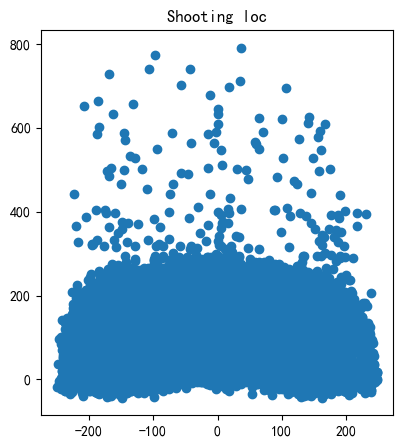

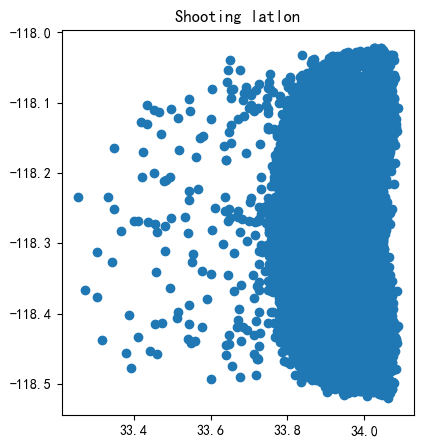

In [21]:
plt.figure(figsize=(5*2, 5))
axes1 = plt.subplot(1,2,1)
axes1.scatter(df['loc_x'],df['loc_y'])
axes1.set_title('Shooting loc')

plt.figure(figsize=(5*2, 5))
axes1 = plt.subplot(1,2,2)
axes1.scatter(df['lat'],df['lon'])
axes1.set_title('Shooting latlon')
plt.show

### 2.Compare action_type
- use line chart

<Axes: ylabel='action_type'>

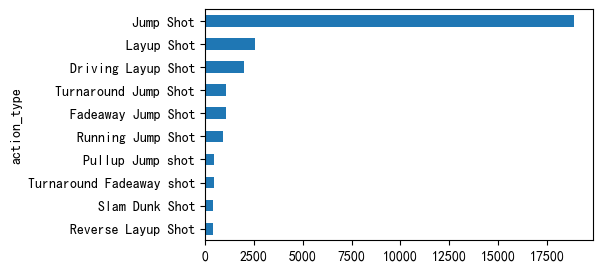

In [28]:
df['action_type'].value_counts().head(10)[::-1].plot.barh(figsize=(5,3))

<BarContainer object of 10 artists>

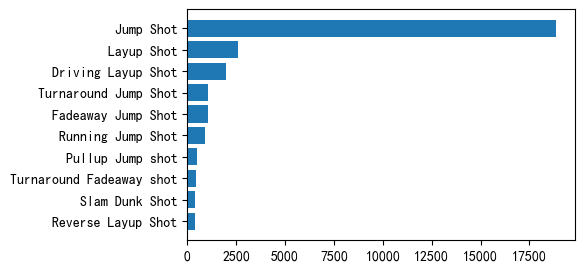

In [31]:
action_type = df['action_type'].value_counts().head(10)[::-1]
plt.figure(figsize=(5,3))
plt.barh(action_type.index,action_type.values)

### 3. Comparison of the accuracy of each type of shot

In [7]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


combined_shot_type
Bank Shot      95.0
Dunk          980.0
Hook Shot      68.0
Jump Shot    7708.0
Layup        2561.0
Tip Shot       53.0
Name: shot_made_flag, dtype: float64

combined_shot_type
Bank Shot      120
Dunk          1056
Hook Shot      127
Jump Shot    19710
Layup         4532
Tip Shot       152
Name: shot_made_flag, dtype: int64

<Axes: xlabel='combined_shot_type'>

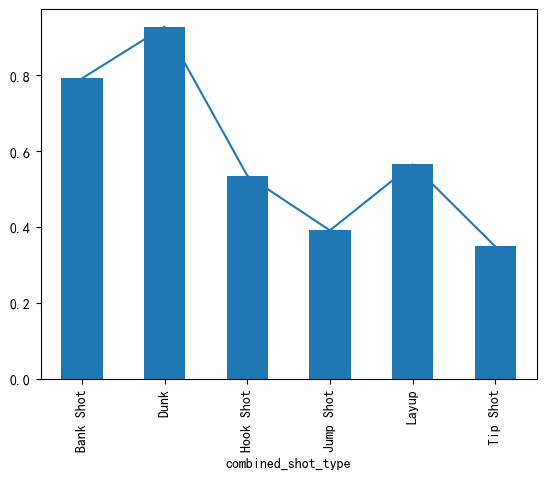

In [8]:
# number of scored shooting type
shot_sum = df.groupby('combined_shot_type')['shot_made_flag'].sum()

# number of each shooting type
shot_count = df.groupby('combined_shot_type')['shot_made_flag'].count()
display(shot_sum,shot_count)

shot_rate = shot_sum / shot_count
shot_rate

shot_rate.plot()
shot_rate.plot.bar()

### 4. Comparison of different zones 

In [11]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [17]:
df.shot_zone_area.value_counts()

shot_zone_area
4    13455
3     4776
0     4588
2     4044
1     3751
5       83
Name: count, dtype: int64

In [18]:
df.shot_zone_basic.value_counts()

shot_zone_basic
0    12625
1     7136
3     5620
2     4578
4      387
6      280
5       71
Name: count, dtype: int64

In [19]:
df.shot_zone_range.value_counts()

shot_zone_range
2    9398
0    8315
1    6626
3    6275
4      83
Name: count, dtype: int64

In [21]:
# put them in numbers
df['shot_zone_area'] = df['shot_zone_area'].factorize()[0]
df['shot_zone_basic'] = df['shot_zone_basic'].factorize()[0]
df['shot_zone_range'] = df['shot_zone_range'].factorize()[0]

In [20]:
df.shot_zone_area

0        0
1        1
2        2
3        3
4        4
        ..
30692    4
30693    4
30694    2
30695    4
30696    4
Name: shot_zone_area, Length: 30697, dtype: int64

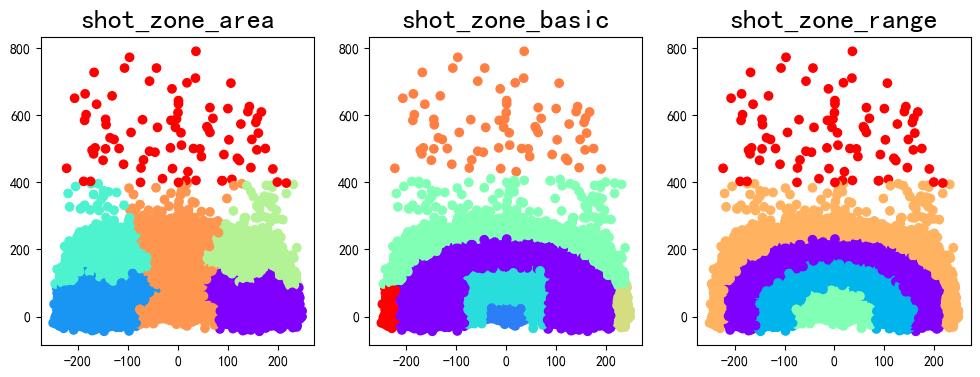

In [27]:
# 3columns 1 row
plt.figure(figsize=(4*3,4))

N = ['shot_zone_area','shot_zone_basic','shot_zone_range']

for k in range(3):
    # k =0,1,2
    col = N[k]
    
    #sub
    axes = plt.subplot(1,3,k+1)
    axes.scatter(df['loc_x'],df['loc_y'],c=df[col],cmap='rainbow')
    axes.set_title(col,fontsize=20)

###  5. Comparison of the number in each period